### CALL CENTER OPERATIONS ANALYTICS
Author Diana Kung'u

Questions:


In [83]:
# Load libraries
import pandas as pd
import time

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='white')

In [27]:

#Read data
#.............................................................................................
chunks = pd.read_csv(r'.\Data\call center.csv', parse_dates=['Call Date Time'], chunksize= 5000)
call_df = pd.concat(chunks, ignore_index= True)

In [38]:
df = call_df.copy()
df.head(3)

,Abandon Flag,Agent,Agent Selection Group,Call #,Call Date Time,Call Reason,Customer,First Contact Resolution Flag,Talk Time (s),Wait Time (s)
0,N,Anabel Grebert,Other,3800023,2021-11-30 09:46:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,143,5
1,N,Anabel Grebert,Other,3796097,2021-11-29 08:21:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,38,6
2,N,Anabel Grebert,Other,3772171,2021-11-18 10:20:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,54,6


In [46]:
#Data Processing 
#Split call date and time fields
Call_Date, Call_Time= zip(*[(d.date(), d.time()) for d in df['Call Date Time']])
df['Call Date'], df['Call Time'] =[Call_Date, Call_Time]

#Format Date and time columns to datetime objects
df['Call Date'] = pd.to_datetime(df['Call Date'], format='%Y-%m-%d')
df['Call Time'] = df['Call Time'].apply(lambda x: x.strftime('%H:%M'))
df.head(2)

,Abandon Flag,Agent,Agent Selection Group,Call #,Call Date Time,Call Reason,Customer,First Contact Resolution Flag,Talk Time (s),Wait Time (s),Call Date,Call Time
0,N,Anabel Grebert,Other,3800023,2021-11-30 09:46:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,143,5,2021-11-30,09:46:00
1,N,Anabel Grebert,Other,3796097,2021-11-29 08:21:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,38,6,2021-11-29,08:21:00


In [117]:
# Parse the Year, Month Day, and hour of each call
df['Year'] = df['Call Date'].dt.year
df['Month'] = df['Call Date'].dt.month
df['Day of Week'] = [d.strftime("%A") for d in df['Call Date']]
df['Hour'] =  df['Call Date Time'].dt.hour
df['Day'] = df['Call Date'].dt.day
df.head(3)


,Abandon Flag,Agent,Agent Selection Group,Call #,Call Date Time,Call Reason,Customer,First Contact Resolution Flag,Talk Time (s),Wait Time (s),Call Date,Call Time,Month,Day of Week,Year,Hour,Day
0,N,Anabel Grebert,Other,3800023,2021-11-30 09:46:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,143,5,2021-11-30,09:46,11,Tuesday,2021,9,30
1,N,Anabel Grebert,Other,3796097,2021-11-29 08:21:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,38,6,2021-11-29,08:21,11,Monday,2021,8,29
2,N,Anabel Grebert,Other,3772171,2021-11-18 10:20:00,Billing Questions,"Anderson, Schoen and Pfannerstill",N,54,6,2021-11-18,10:20,11,Thursday,2021,10,18


#### Call Reasons
1. Frequency of call by reasons
2. Distribution

1. Frequency of Calls by reason

In [92]:
# Unique call reasons
reasons  = df['Call Reason'].unique().tolist()
#Frequency of each reason
df_reasons = df.groupby(['Call Reason']).agg(No_Calls =('Call #', 'count')).reset_index()
df_reasons['Proportion'] =df_reasons['No_Calls']*100/df_reasons['No_Calls'].sum()
df_reasons['Proportion %'] = df_reasons['Proportion'].map('{:,.1f}%'.format)
df_reasons

,Call Reason,No_Calls,Proportion,Proportion %
0,Billing Questions,55192,21.957003,22.0%
1,Internet Outage,72671,28.910663,28.9%
2,New Customer,5871,2.335657,2.3%
3,Other,927,0.368788,0.4%
4,Product/Service Problems,21905,8.714454,8.7%
5,Technical Issues,94798,37.713435,37.7%


<AxesSubplot:title={'center':'Proportion of Calls per Reason'}, xlabel='Call Reason', ylabel='Proportion'>

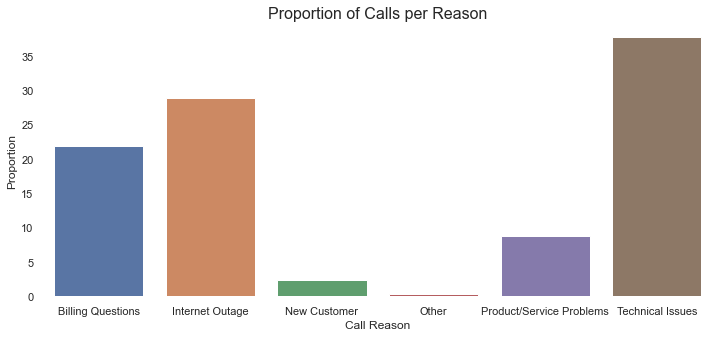

In [114]:
plt.figure(figsize=(12,5))
plt.title('Proportion of Calls per Reason', fontsize = 16)

sns.despine(bottom = True, left = True)
sns.barplot(x = 'Call Reason', y = 'Proportion', data = df_reasons)


Technical Issues, Internet Outages and Billing Questions account for the largest number
of calls.

2. Distribution

Number of calls per reason by day/day of week are evenly distributed.

In [133]:
df_day_distribution = df.groupby(['Call Reason', 'Day of Week']).agg(No_Calls =('Call #', 'count')).reset_index()
df_day_distribution

,Call Reason,Day of Week,No_Calls
0,Billing Questions,Friday,9116
1,Billing Questions,Monday,11182
2,Billing Questions,Thursday,10929
3,Billing Questions,Tuesday,12072
4,Billing Questions,Wednesday,11893
5,Internet Outage,Friday,12056
6,Internet Outage,Monday,14715
7,Internet Outage,Thursday,14183
8,Internet Outage,Tuesday,16157
9,Internet Outage,Wednesday,15560


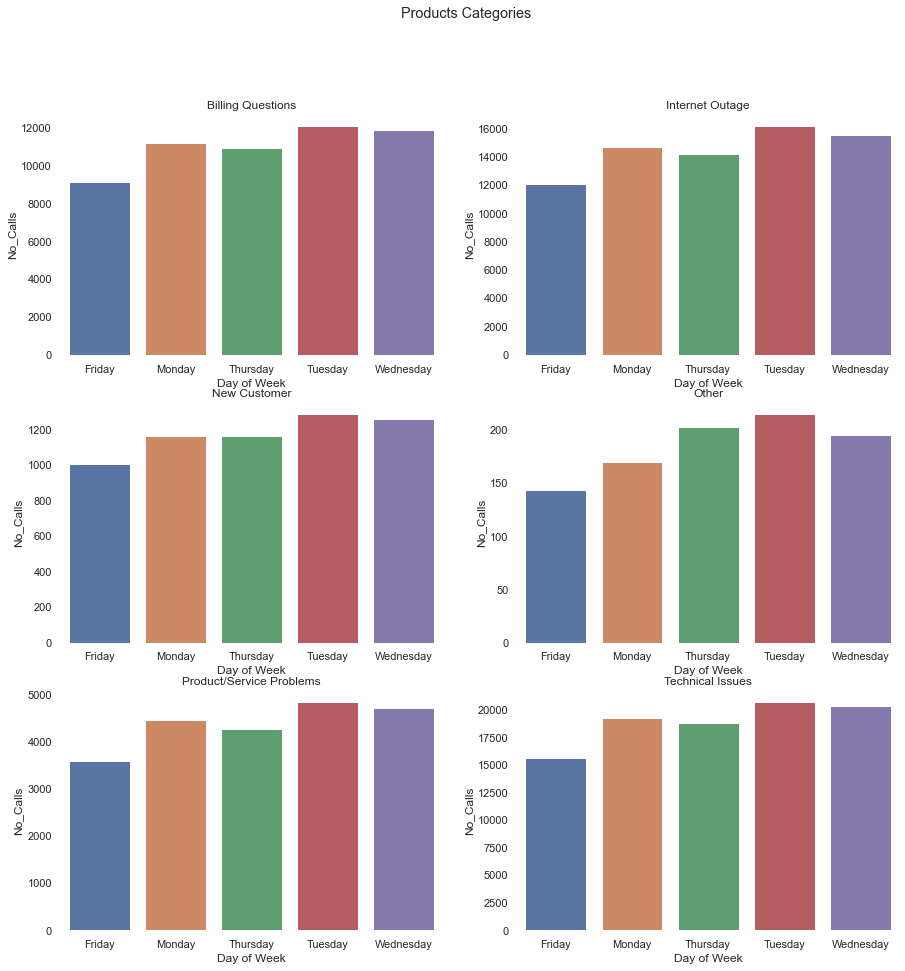

In [134]:
figure, axis = plt.subplots(3, 2,figsize=(15, 15), facecolor='w', edgecolor='k')

a = 3 #rows
b = 2 # columns
c = 1 # subplot iterator

for i in df_day_distribution['Call Reason'].unique():
    plt.subplot(a, b, c)
    plt.title(f'{i}')
    plt.xlabel(i)
    plt.suptitle('Products Categories')
    plt.ylabel('')
    #cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.barplot(x = 'Day of Week', y = 'No_Calls', data = df_day_distribution[df_day_distribution['Call Reason'] == i])
    sns.despine(bottom = True, left = True)
    c = c + 1
                